# **Aula 1 Engenharia de Dados**

### Objetivo:
- Entender como os dados estão estruturados e as informações que eles contêm.
- Qual é a relação entre os descontos aplicados e o valor total pago?
- Como promoções impactam o valor total dos pedidos e as avaliações do cliente.
- Como o tempo de entrega e o tempo de espera do entregador afetam a avaliação do cliente?

In [132]:
import os

import pandas as pd
import kagglehub
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

### Lendo o arquivo utilizando a API do kaggle

In [133]:
path = kagglehub.dataset_download("sujalsuthar/food-delivery-order-history-data")
files = os.listdir(path)
csv_file = [file for file in files if file.endswith('.csv')][0]
csv_path = os.path.join(path, csv_file)
df = pd.read_csv(csv_path)

In [134]:
df.head()

,Restaurant ID,Restaurant name,Subzone,City,Order ID,Order Placed At,Order Status,Delivery,Distance,Items in order,...,Rating,Review,Cancellation / Rejection reason,Restaurant compensation (Cancellation),Restaurant penalty (Rejection),KPT duration (minutes),Rider wait time (minutes),Order Ready Marked,Customer complaint tag,Customer ID
0,20320607,Swaad,Sector 4,Delhi NCR,6168884918,"11:38 PM, September 10 2024",Delivered,Zomato Delivery,3km,"1 x Grilled Chicken Jamaican Tender, 1 x Grill...",...,NaN,NaN,NaN,NaN,NaN,18.35,11.6,Correctly,NaN,5d6c2b96db963098bc69768bea504c8bf46106a8a5178e...
1,20320607,Swaad,Sector 4,Delhi NCR,6170707559,"11:34 PM, September 10 2024",Delivered,Zomato Delivery,2km,"1 x Peri Peri Fries, 1 x Fried Chicken Angara ...",...,NaN,NaN,NaN,NaN,NaN,16.95,3.6,Correctly,NaN,0781815deb4a10a574e9fee4fa0b86b074d4a0b36175d5...
2,20320607,Swaad,Sector 4,Delhi NCR,6169375019,"03:52 PM, September 10 2024",Delivered,Zomato Delivery,<1km,1 x Bone in Peri Peri Grilled Chicken,...,NaN,NaN,NaN,NaN,NaN,14.05,12.2,Correctly,NaN,f93362f5ce5382657482d164e368186bcec9c6225fd93d...
3,20320607,Swaad,Sector 4,Delhi NCR,6151677434,"03:45 PM, September 10 2024",Delivered,Zomato Delivery,2km,"1 x Fried Chicken Ghostbuster Tender, 1 x Anga...",...,4.0,NaN,NaN,NaN,NaN,19.00,3.3,Correctly,NaN,1ed226d1b8a5f7acee12fc1d6676558330a3b2b742af5d...
4,20320607,Swaad,Sector 4,Delhi NCR,6167540897,"03:04 PM, September 10 2024",Delivered,Zomato Delivery,2km,"1 x Peri Peri Krispers, 1 x Fried Chicken Anga...",...,NaN,NaN,NaN,NaN,NaN,15.97,1.0,Correctly,NaN,d21a2ac6ea06b31cc3288ab20c4ef2f292066c096f2c5f...


In [135]:
print(f"Formato do arquivo: {df.shape[0]} linhas e {df.shape[1]} colunas")

Formato do arquivo: 21321 linhas e 29 colunas


In [136]:
print(f"Colunas: {df.columns}")

Colunas: Index(['Restaurant ID', 'Restaurant name', 'Subzone', 'City', 'Order ID',
       'Order Placed At', 'Order Status', 'Delivery', 'Distance',
       'Items in order', 'Instructions', 'Discount construct', 'Bill subtotal',
       'Packaging charges', 'Restaurant discount (Promo)',
       'Restaurant discount (Flat offs, Freebies & others)', 'Gold discount',
       'Brand pack discount', 'Total', 'Rating', 'Review',
       'Cancellation / Rejection reason',
       'Restaurant compensation (Cancellation)',
       'Restaurant penalty (Rejection)', 'KPT duration (minutes)',
       'Rider wait time (minutes)', 'Order Ready Marked',
       'Customer complaint tag', 'Customer ID'],
      dtype='object')


Resumo estatístico das variáveis numéricas

In [137]:
df.describe()

,Restaurant ID,Order ID,Bill subtotal,Packaging charges,Restaurant discount (Promo),"Restaurant discount (Flat offs, Freebies & others)",Gold discount,Brand pack discount,Total,Rating,Restaurant compensation (Cancellation),Restaurant penalty (Rejection),KPT duration (minutes),Rider wait time (minutes)
count,2.132100e+04,2.132100e+04,21321.000000,21321.000000,21321.000000,21321.000000,21321.000000,21321.000000,21321.000000,2491.000000,133.000000,3.0,21026.000000,21153.000000
mean,2.074413e+07,6.354622e+09,750.076838,32.564592,65.091816,31.795058,0.099128,3.039324,682.616113,4.356885,356.409549,0.0,17.332960,4.825070
std,2.447193e+05,1.230263e+08,498.759428,22.235898,85.401604,131.487091,3.264261,17.070780,465.313977,1.181472,328.128240,0.0,6.283388,4.982591
min,2.032061e+07,6.086767e+09,50.000000,0.000000,0.000000,0.000000,0.000000,0.000000,52.500000,1.000000,83.580000,0.0,0.000000,0.100000
25%,2.063570e+07,6.250751e+09,459.000000,18.450000,0.000000,0.000000,0.000000,0.000000,387.450000,4.000000,191.950000,0.0,13.380000,1.000000
50%,2.065987e+07,6.357715e+09,629.000000,28.450000,80.000000,0.000000,0.000000,0.000000,597.450000,5.000000,272.580000,0.0,16.330000,3.100000
75%,2.088265e+07,6.456827e+09,899.000000,39.950000,100.000000,0.000000,0.000000,0.000000,837.900000,5.000000,397.840000,0.0,20.050000,7.400000
max,2.152306e+07,6.573392e+09,16080.000000,603.000000,4020.000000,7787.000000,280.100000,554.800000,12663.000000,5.000000,3236.980000,0.0,90.870000,73.800000


### Criando um subconjunto dos dados para anlisar o desempenho dos restaurantes

In [138]:
df_restaurants = df[['Restaurant discount (Promo)', 'Restaurant discount (Flat offs, Freebies & others)', 
    'Gold discount', 'Brand pack discount', 'Total']]

df_restaurants.head()

,Restaurant discount (Promo),"Restaurant discount (Flat offs, Freebies & others)",Gold discount,Brand pack discount,Total
0,80.0,0.0,0.0,0.0,666.75
1,175.0,0.0,0.0,0.0,1054.20
2,80.0,0.0,0.0,0.0,241.50
3,80.0,0.0,0.0,0.0,567.00
4,80.0,0.0,0.0,0.0,529.20


In [139]:
df_restaurants.isnull().sum()

Restaurant discount (Promo)                           0
Restaurant discount (Flat offs, Freebies & others)    0
Gold discount                                         0
Brand pack discount                                   0
Total                                                 0
dtype: int64

In [140]:
desconto_cols = ['Restaurant discount (Promo)', 
                 'Restaurant discount (Flat offs, Freebies & others)', 
                 'Gold discount', 
                 'Brand pack discount', 
                 'Total', 'Rating']

In [141]:
df[desconto_cols] = df[desconto_cols].fillna(0)

In [142]:
df['Total Discount'] = (df['Restaurant discount (Promo)'] + 
                        df['Restaurant discount (Flat offs, Freebies & others)'] + 
                        df['Gold discount'] + 
                        df['Brand pack discount'])

Resumo estatístico das variáveis numéricas

In [143]:
print(df[['Total Discount', 'Total', 'Rating']].describe())

       Total Discount         Total        Rating
count    21321.000000  21321.000000  21321.000000
mean       100.025326    682.616113      0.509029
std        145.885555    465.313977      1.456636
min          0.000000     52.500000      0.000000
25%          0.000000    387.450000      0.000000
50%         90.000000    597.450000      0.000000
75%        120.000000    837.900000      0.000000
max       7787.000000  12663.000000      5.000000


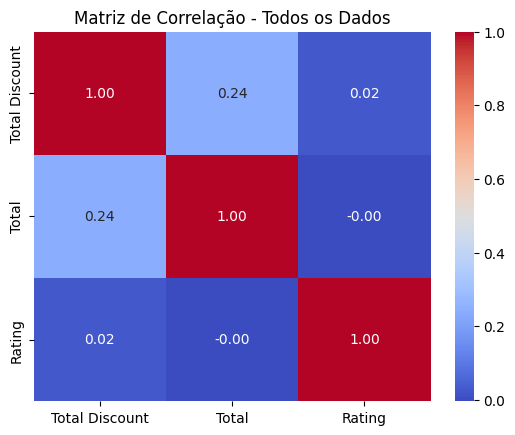

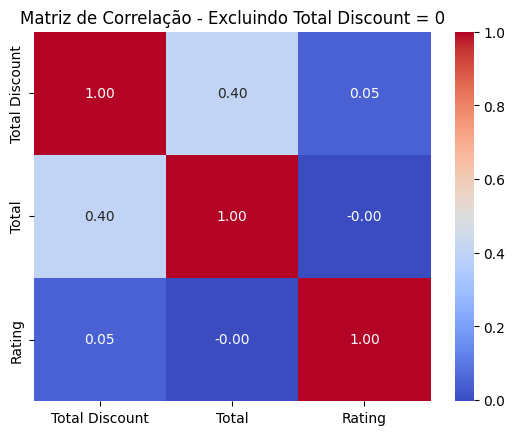

In [144]:
# Matriz de correlação normal
correlation_matrix_all = df[['Total Discount', 'Total', 'Rating']].corr()
sns.heatmap(correlation_matrix_all, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlação - Todos os Dados')
plt.show()

# Matriz de correlação excluindo "Total Discount" igual a 0
df_no_zero_discounts = df[df['Total Discount'] > 0]
correlation_matrix_no_zero = df_no_zero_discounts[['Total Discount', 'Total', 'Rating']].corr()
sns.heatmap(correlation_matrix_no_zero, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlação - Excluindo Total Discount = 0')
plt.show()

É possivel observar por meio do gráfico e dos valores da correlação de pearson que a força da correlação entre as variáveis é fraca, ou seja, não necessariamente aumentar o desconto aplicado resultará em um aumento no valor total pago.

### Analisando a relação entre o tempo de entrega e o tempo de espera do entregador com a avaliação do cliente

In [145]:
df_delivery = df[['Rider wait time (minutes)', 'Delivery', 'Rating']]

df_delivery.head()

,Rider wait time (minutes),Delivery,Rating
0,11.6,Zomato Delivery,0.0
1,3.6,Zomato Delivery,0.0
2,12.2,Zomato Delivery,0.0
3,3.3,Zomato Delivery,4.0
4,1.0,Zomato Delivery,0.0


In [146]:
df_delivery.isnull().sum()

Rider wait time (minutes)    168
Delivery                       0
Rating                         0
dtype: int64

In [147]:
df_delivery = df_delivery.dropna(subset=['Rating'])

In [148]:
correlation = df_delivery[['Rider wait time (minutes)', 'Rating']].corr().iloc[0, 1]
print(f"correlation: {correlation:.2f}")

correlation: 0.00


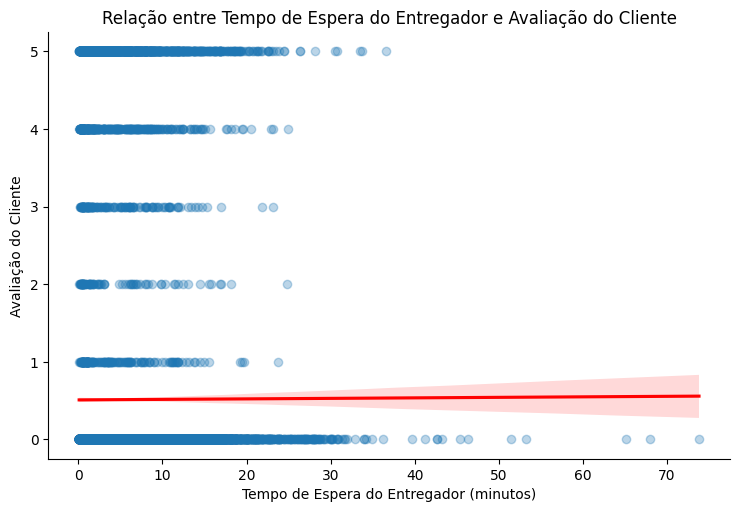

In [149]:
sns.lmplot(x='Rider wait time (minutes)', y='Rating', data=df_delivery, aspect=1.5, scatter_kws={'alpha':0.3}, line_kws={'color':'red'})
plt.title('Relação entre Tempo de Espera do Entregador e Avaliação do Cliente')
plt.xlabel('Tempo de Espera do Entregador (minutos)')
plt.ylabel('Avaliação do Cliente')
plt.show()

Com o baixo valor da correlação e visualizando o gráfico de dispersão, é possível observar que não há uma relação linear entre o tempo de entrega e o tempo de espera do entregador com a avaliação do cliente.